In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For multiple output statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Data

In [63]:
main_data = pd.read_csv('C:/Users/caruza laine/Documents/Datakind/Data/Pollution Health and Sociodemographic data.csv')

In [65]:
main_data.head()

,LSOA Code,LSOA Name,NOx,PM10,PM2.5,Health_212,Health_241,Health_253,Health_273,Health_285,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
0,E01003015,Lambeth 002A,92.937396,25.316589,14.811003,0.0151,0.0743,0.015200,0.0204,0.0519,...,0.035,1.122,0.154,0.038,0.635,1.950,1.448,33300,33900,46600
1,E01003108,Lambeth 002B,91.681516,24.961416,14.619119,0.0101,0.0610,0.012500,0.0144,0.0417,...,0.026,0.948,0.146,0.033,0.635,1.763,1.838,33300,33900,46600
2,E01003110,Lambeth 002C,90.391829,25.016524,14.660689,0.0109,0.0636,0.013706,0.0154,0.0436,...,0.039,0.948,0.146,0.033,0.635,1.763,1.690,33300,33900,46600
3,E01003111,Lambeth 002D,82.377870,24.266551,14.398075,0.0119,0.0685,0.012600,0.0163,0.0449,...,0.015,0.948,0.146,0.033,0.635,1.763,1.304,33300,33900,46600
4,E01003112,Lambeth 002E,93.504836,25.057326,14.741619,0.0147,0.0816,0.012000,0.0191,0.0495,...,0.024,1.009,0.151,0.035,0.651,1.846,1.372,33300,33900,46600


#### How do I see all my metrics?

In [4]:
main_data.columns.values

array(['LSOA Code', 'LSOA Name', 'NOx', 'PM10', 'PM2.5', 'Health_212',
       'Health_241', 'Health_253', 'Health_273', 'Health_285',
       'Health_606', 'Health_607', 'Health_609', 'Health_849',
       'Health_92590', 'Health_92604', 'Health_92608', 'Health_92612',
       'Population aged 0-15', 'Population of working age (16-64)',
       'Population aged 65+', 'Total population',
       'Population density (persons per hectare)',
       'Area hectares (population density denominator)',
       'Change in unemployment claimant rate 2005 to 2019',
       'Change in population 2001 to 2017', 'White British ethnic group',
       'Non-white ethnic group', 'Christian', 'Buddhist', 'Hindu',
       'Jewish', 'Muslim', 'Sikh', 'Other religion',
       'People with no religious belief', 'White ethnic groups',
       'White Irish', 'White Gypsy or Irish Traveller', 'White Other',
       'Mixed White and Black Caribbean', 'Mixed White and Black African',
       'Mixed White and Asian', 'Other Mi

#### Let's answer the warm up question: Plot the pollution data into LSOA's

In [5]:
#First you need to install the dependencies needed to see geo spatial data. From warm up need to install pip install depencies.
#I used conda install geopandas

In [6]:
import geopandas as gpd

In [7]:
geo_data = gpd.read_file('C:/Users/caruza laine/Documents/Datakind/Data/LSOA Geographies.shp')

In [8]:
geo_data.head()

,LSOA_Code,LSOA_Name,geometry
0,E01003013,Lambeth 036A,POLYGON ((-0.1148126420910488 51.5005803578006...
1,E01003014,Lambeth 036B,POLYGON ((-0.1095201184293505 51.4983760551768...
2,E01003015,Lambeth 002A,POLYGON ((-0.112696104514192 51.49550272150114...
3,E01003016,Lambeth 036C,POLYGON ((-0.1089261800669778 51.5084403816889...
4,E01003017,Lambeth 036D,POLYGON ((-0.1069985887250327 51.5062216126442...


##### Let's join our data

In [9]:
merged_data = geo_data.merge(main_data, left_on = "LSOA_Code", right_on = "LSOA Code")

In [10]:
merged_data.head()

,LSOA_Code,LSOA_Name,geometry,LSOA Code,LSOA Name,NOx,PM10,PM2.5,Health_212,Health_241,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
0,E01003013,Lambeth 036A,POLYGON ((-0.1148126420910488 51.5005803578006...,E01003013,Lambeth 036A,114.283802,26.881237,15.549714,0.00765,0.0373,...,0.070,1.122,0.154,0.038,0.658,1.972,1.151,43200,43100,56300
1,E01003014,Lambeth 036B,POLYGON ((-0.1095201184293505 51.4983760551768...,E01003014,Lambeth 036B,106.041920,26.435985,15.261605,0.01270,0.0620,...,0.028,1.122,0.154,0.038,0.658,1.972,1.605,43200,43100,56300
2,E01003015,Lambeth 002A,POLYGON ((-0.112696104514192 51.49550272150114...,E01003015,Lambeth 002A,92.937396,25.316589,14.811003,0.01510,0.0743,...,0.035,1.122,0.154,0.038,0.635,1.950,1.448,33300,33900,46600
3,E01003016,Lambeth 036C,POLYGON ((-0.1089261800669778 51.5084403816889...,E01003016,Lambeth 036C,117.913832,27.217769,15.942373,0.00679,0.0376,...,0.021,1.147,0.164,0.045,0.664,2.020,2.118,43200,43100,56300
4,E01003017,Lambeth 036D,POLYGON ((-0.1069985887250327 51.5062216126442...,E01003017,Lambeth 036D,103.573867,26.082033,15.311363,0.00684,0.0382,...,0.044,1.147,0.164,0.045,0.664,2.020,2.108,43200,43100,56300


##### Now we can plot our data into the 3 different pollutants we have

##### NOx

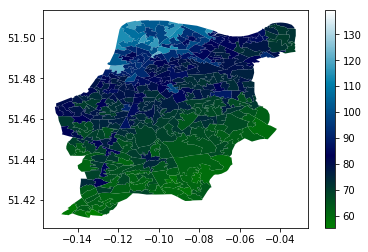

In [11]:
merged_data.plot(column='NOx', cmap='ocean', legend = True)
## to reverse add '_r' after your cmap

###### PM10

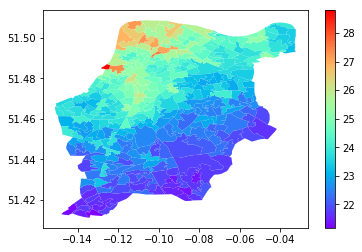

In [12]:
merged_data.plot(column = 'PM10', cmap='rainbow',legend = True)

###### PM2.5

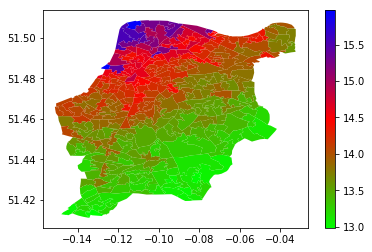

In [13]:
merged_data.plot(column = 'PM2.5', cmap='brg_r',legend = True)

#### Now what? Let's do some actual anaylsis!

###### Which area has the most NOx value?

###### NOx

In [14]:
merged_data.sort_values(['NOx'], ascending=False).head()

,LSOA_Code,LSOA_Name,geometry,LSOA Code,LSOA Name,NOx,PM10,PM2.5,Health_212,Health_241,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
343,E01033208,Lambeth 004G,"POLYGON ((-0.124679028589067 51.4844016463929,...",E01033208,Lambeth 004G,139.215377,28.791450,15.970339,0.00209,0.0145,...,0.084,0.899,0.143,0.034,0.631,1.706,2.174,36000,38900,46600
336,E01032719,Southwark 014G,"POLYGON ((-0.09844944319901 51.49245642116701,...",E01032719,Southwark 014G,122.497093,27.580103,15.473198,0.01020,0.0647,...,0.023,0.948,0.146,0.033,0.635,1.763,3.196,34500,38300,40900
89,E01003102,Lambeth 004A,POLYGON ((-0.1173192460900157 51.4861429615110...,E01003102,Lambeth 004A,121.708823,27.383327,15.388572,0.00335,0.0211,...,0.037,0.899,0.143,0.034,0.631,1.706,2.246,36000,38900,46600
3,E01003016,Lambeth 036C,POLYGON ((-0.1089261800669778 51.5084403816889...,E01003016,Lambeth 036C,117.913832,27.217769,15.942373,0.00679,0.0376,...,0.021,1.147,0.164,0.045,0.664,2.020,2.118,43200,43100,56300
330,E01032584,Southwark 034E,POLYGON ((-0.1066587346261398 51.5005019756571...,E01032584,Southwark 034E,116.841570,27.280124,15.430004,0.00952,0.0564,...,0.031,1.122,0.154,0.038,0.658,1.972,1.836,37700,37800,54500


##### PM10

In [15]:
merged_data.sort_values(['PM10'], ascending=False).head()

,LSOA_Code,LSOA_Name,geometry,LSOA Code,LSOA Name,NOx,PM10,PM2.5,Health_212,Health_241,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
343,E01033208,Lambeth 004G,"POLYGON ((-0.124679028589067 51.4844016463929,...",E01033208,Lambeth 004G,139.215377,28.791450,15.970339,0.00209,0.0145,...,0.084,0.899,0.143,0.034,0.631,1.706,2.174,36000,38900,46600
336,E01032719,Southwark 014G,"POLYGON ((-0.09844944319901 51.49245642116701,...",E01032719,Southwark 014G,122.497093,27.580103,15.473198,0.01020,0.0647,...,0.023,0.948,0.146,0.033,0.635,1.763,3.196,34500,38300,40900
89,E01003102,Lambeth 004A,POLYGON ((-0.1173192460900157 51.4861429615110...,E01003102,Lambeth 004A,121.708823,27.383327,15.388572,0.00335,0.0211,...,0.037,0.899,0.143,0.034,0.631,1.706,2.246,36000,38900,46600
330,E01032584,Southwark 034E,POLYGON ((-0.1066587346261398 51.5005019756571...,E01032584,Southwark 034E,116.841570,27.280124,15.430004,0.00952,0.0564,...,0.031,1.122,0.154,0.038,0.658,1.972,1.836,37700,37800,54500
3,E01003016,Lambeth 036C,POLYGON ((-0.1089261800669778 51.5084403816889...,E01003016,Lambeth 036C,117.913832,27.217769,15.942373,0.00679,0.0376,...,0.021,1.147,0.164,0.045,0.664,2.020,2.118,43200,43100,56300


##### PM2.5

In [16]:
merged_data.sort_values(['PM2.5'], ascending=False).head()

,LSOA_Code,LSOA_Name,geometry,LSOA Code,LSOA Name,NOx,PM10,PM2.5,Health_212,Health_241,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
343,E01033208,Lambeth 004G,"POLYGON ((-0.124679028589067 51.4844016463929,...",E01033208,Lambeth 004G,139.215377,28.791450,15.970339,0.00209,0.0145,...,0.084,0.899,0.143,0.034,0.631,1.706,2.174,36000,38900,46600
3,E01003016,Lambeth 036C,POLYGON ((-0.1089261800669778 51.5084403816889...,E01003016,Lambeth 036C,117.913832,27.217769,15.942373,0.00679,0.0376,...,0.021,1.147,0.164,0.045,0.664,2.020,2.118,43200,43100,56300
0,E01003013,Lambeth 036A,POLYGON ((-0.1148126420910488 51.5005803578006...,E01003013,Lambeth 036A,114.283802,26.881237,15.549714,0.00765,0.0373,...,0.070,1.122,0.154,0.038,0.658,1.972,1.151,43200,43100,56300
328,E01032582,Lambeth 036E,POLYGON ((-0.1162311219638912 51.5051546128873...,E01032582,Lambeth 036E,107.690555,26.567652,15.518289,0.00621,0.0309,...,0.078,1.122,0.154,0.038,0.658,1.972,1.578,43200,43100,56300
336,E01032719,Southwark 014G,"POLYGON ((-0.09844944319901 51.49245642116701,...",E01032719,Southwark 014G,122.497093,27.580103,15.473198,0.01020,0.0647,...,0.023,0.948,0.146,0.033,0.635,1.763,3.196,34500,38300,40900


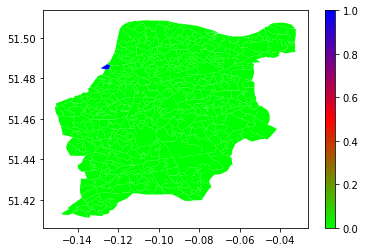

In [17]:
merged_data['Flag']=np.where(merged_data['LSOA Name']=='Lambeth 004G',1,0)
merged_data.plot(column = 'Flag', cmap='brg_r',legend = True)

##### What if I want to see top N on the map?

In [18]:
# Select top
top = 10

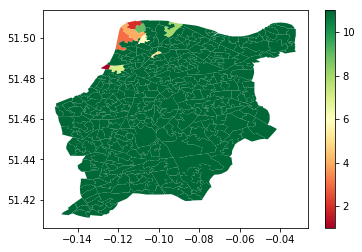

In [19]:
# Creating ranks for PM
merged_data['Rank'] = merged_data['PM2.5'].rank(ascending = False)

merged_data['Rank']=np.where(merged_data['Rank']>=top,top+1,merged_data['Rank'])
merged_data.plot(column = 'Rank', cmap='RdYlGn',legend = True)

##### Ok, we should probably actually start doing some "Time" stuff.

In [20]:
daily = pd.read_csv('C:/Users/caruza laine/Documents/Datakind/Data/time_series/daily_time_series.csv')

In [21]:
hourly = pd.read_csv('C:/Users/caruza laine/Documents/Datakind/Data/time_series/hourly_time_series.csv')

In [22]:
daily.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,SiteName
0,SK6,NO,01/01/1993 00:00,NaN,ug m-3,R,elephant_and_castle
1,SK6,NO,02/01/1993 00:00,NaN,ug m-3,R,elephant_and_castle
2,SK6,NO,03/01/1993 00:00,NaN,ug m-3,R,elephant_and_castle
3,SK6,NO,04/01/1993 00:00,NaN,ug m-3,R,elephant_and_castle
4,SK6,NO,05/01/1993 00:00,NaN,ug m-3,R,elephant_and_castle


In [23]:
hourly.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,SiteName
0,SK5,NO,01/01/2016 00:00,6.1,ug m-3,R,old_kent_road
1,SK5,NO,01/01/2016 01:00,22.7,ug m-3,R,old_kent_road
2,SK5,NO,01/01/2016 02:00,34.8,ug m-3,R,old_kent_road
3,SK5,NO,01/01/2016 03:00,45.9,ug m-3,R,old_kent_road
4,SK5,NO,01/01/2016 04:00,101.5,ug m-3,R,old_kent_road


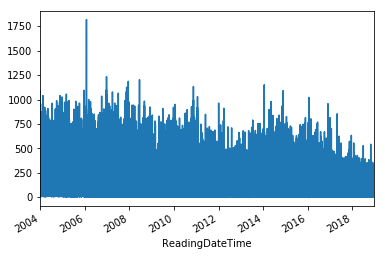

In [24]:
daily['ReadingDateTime'] = pd.to_datetime(daily['ReadingDateTime'])
daily = daily.set_index(daily['ReadingDateTime'])
daily.Value.dropna().plot()

In [25]:
#How many sites do we have?
daily.Site.unique()
daily.Site.value_counts()

array(['SK6', 'SK5', 'LB4', 'LB6', 'LB5'], dtype=object)

LB5    47480
LB4    47480
SK6    47480
LB6    37984
SK5    37984
Name: Site, dtype: int64

In [26]:
# Create multiple for all sites
site_list = daily.Site.unique()
site_list

array(['SK6', 'SK5', 'LB4', 'LB6', 'LB5'], dtype=object)

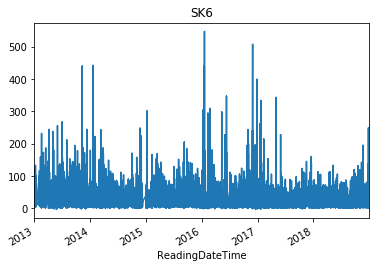

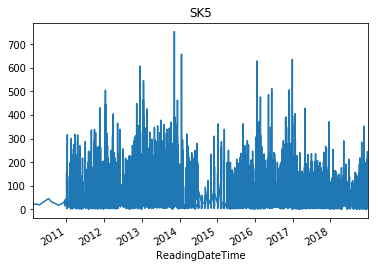

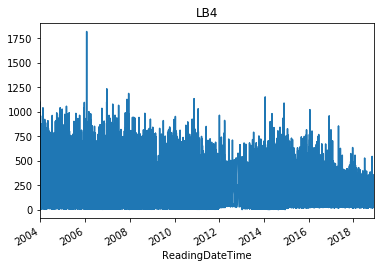

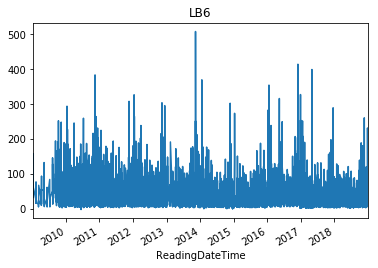

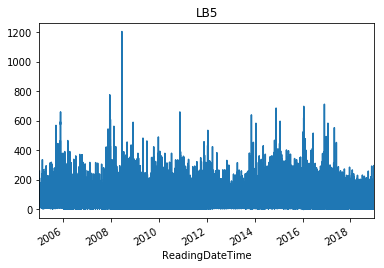

In [27]:
for i in site_list:
        site_data = daily[daily['Site']==i]
        _ = plt.figure()
        _ = plt.title(i)
        _ = site_data.Value.dropna().plot()

In [28]:
# Multiple units
daily.Units.unique()
daily.groupby(['Site','Units'])['Value'].count()

array(['ug m-3', 'ug m-3 as NO2', 'ug m-3 reference equiv by 1.3 factor',
       'ug m-3 reference equiv by VCM', 'ug/m3'], dtype=object)

Site  Units                               
LB4   ug m-3                                  11233
      ug m-3 as NO2                            4181
      ug/m3                                    4005
LB5   ug m-3                                  12359
      ug m-3 as NO2                            4119
      ug/m3                                    3750
LB6   ug m-3                                   5846
      ug m-3 as NO2                            2923
      ug/m3                                    1637
SK5   ug m-3                                   4565
      ug m-3 as NO2                            2259
      ug/m3                                    2188
SK6   ug m-3                                   5995
      ug m-3 as NO2                            1989
      ug m-3 reference equiv by 1.3 factor        0
      ug m-3 reference equiv by VCM            1972
Name: Value, dtype: int64

In [29]:
daily.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug m-3 reference equiv by 1.3 factor',
       'ug m-3 reference equiv by VCM', 'ug/m3'], dtype=object)

In [30]:
daily_units = daily[daily['Units']=='ug m-3']

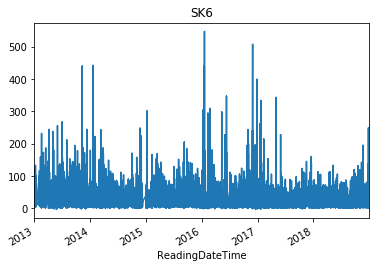

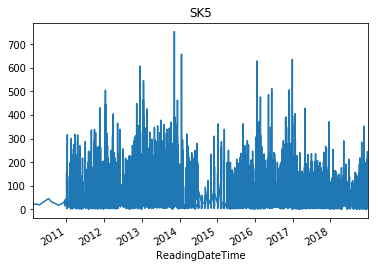

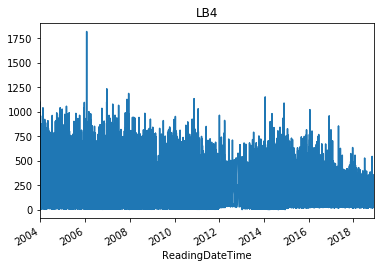

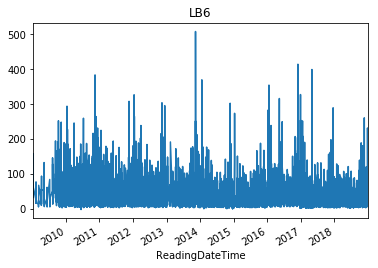

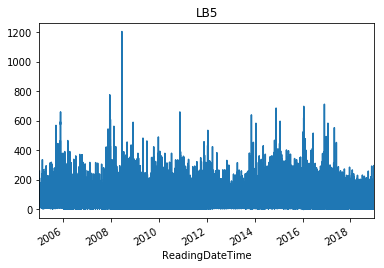

In [67]:
def plot_sites(data):
    for i in site_list:
        site_data = daily[daily['Site']==i]
        _ = plt.figure()
        _ = plt.title(i)
        _ = site_data.Value.dropna().plot()

plot_sites(daily_units)

## Correlation Analysis

In [34]:
# Are the pollutants strongly correlated, so we can get rid of 2 of them for clustering?
# At this stage of analysis --> Test hypothesis e.g. do areas with high population age 0-15 live in areas with high pollution?
#Lots of ways to do VARIABLE SELECTION.

corr = main_data.corr(method='pearson')
corr

,NOx,PM10,PM2.5,Health_212,Health_241,Health_253,Health_273,Health_285,Health_606,Health_607,...,ID 2015 Houses without central heating indicator,ID 2015 Nitrogen dioxide (component of air quality indicator),ID 2015 Benzene (component of air quality indicator),ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate
NOx,1.000000,0.947308,0.965689,-0.248840,-0.133670,0.184361,-0.148134,-0.520214,-0.370041,0.161173,...,0.249504,0.851152,0.841004,0.776413,0.838386,0.854328,0.372464,0.063526,-0.028547,-0.004755
PM10,0.947308,1.000000,0.977202,-0.231258,-0.141589,0.253130,-0.159655,-0.495913,-0.348146,0.129791,...,0.230968,0.858044,0.856107,0.774170,0.856135,0.863835,0.371608,0.011344,-0.077848,-0.057186
PM2.5,0.965689,0.977202,1.000000,-0.252846,-0.163771,0.223377,-0.156369,-0.527427,-0.422733,0.142941,...,0.227819,0.911986,0.913808,0.834754,0.897502,0.916207,0.328178,0.082457,-0.013837,0.008666
Health_212,-0.248840,-0.231258,-0.252846,1.000000,0.466968,0.377579,0.761998,0.574244,0.042523,-0.313122,...,-0.035328,-0.205710,-0.221920,-0.297046,-0.247663,-0.217703,0.056415,-0.166484,-0.211172,-0.141440
Health_241,-0.133670,-0.141589,-0.163771,0.466968,1.000000,0.237079,0.539228,0.218600,-0.020077,-0.391431,...,-0.005691,-0.074614,-0.115641,-0.101912,-0.081789,-0.079417,0.034775,-0.508042,-0.446032,-0.437305
Health_253,0.184361,0.253130,0.223377,0.377579,0.237079,1.000000,0.525486,0.110908,-0.082411,0.022103,...,0.036860,0.336546,0.262537,0.335230,0.312507,0.329928,-0.000886,-0.209116,-0.219658,-0.229415
Health_273,-0.148134,-0.159655,-0.156369,0.761998,0.539228,0.525486,1.000000,0.412725,-0.212046,-0.267958,...,0.028296,-0.088862,-0.134358,-0.083637,-0.141282,-0.102458,-0.054341,-0.115160,-0.117010,-0.085626
Health_285,-0.520214,-0.495913,-0.527427,0.574244,0.218600,0.110908,0.412725,1.000000,0.230409,-0.263360,...,-0.172697,-0.509479,-0.497548,-0.562234,-0.533370,-0.518250,-0.063329,-0.073663,-0.072442,-0.048388
Health_606,-0.370041,-0.348146,-0.422733,0.042523,-0.020077,-0.082411,-0.212046,0.230409,1.000000,0.348831,...,-0.190657,-0.426325,-0.468817,-0.449541,-0.418941,-0.431608,-0.037468,-0.202982,-0.163328,-0.169775
Health_607,0.161173,0.129791,0.142941,-0.313122,-0.391431,0.022103,-0.267958,-0.263360,0.348831,1.000000,...,-0.023297,0.118049,0.083207,0.195085,0.104866,0.115330,-0.105004,0.023432,0.036879,0.003698


# CLUSTERING!

In [35]:
#This is like a function, similar to what we made earlier. e.g downloading predictive tools in Alteryx.
from sklearn.cluster import KMeans

In [36]:
#At the moment, we don't know how many clusters we need, so just put a high number.
kmeans = KMeans(n_clusters = 20)

In [37]:
#Find out which columns are all nulls
tmp = merged_data.isna().sum()
tmp[tmp>0]

Health_212                                                                                                                 1
Health_241                                                                                                                 1
Health_253                                                                                                                 1
Health_273                                                                                                                 1
Health_285                                                                                                                 1
Health_607                                                                                                                 1
Health_609                                                                                                                 7
Health_849                                                                                                                 1


In [38]:
#How many rows do we have in our data?
#Use shape[1] to see columns
merged_data.shape[0]

344

In [39]:
# Start analysis like this
# merged_data.describe().T

In [40]:
merged_data.shape[1]

315

In [112]:
merged_data.index = merged_data['LSOA Name']

In [114]:
#get rid of columns with all nulls
merged_data = merged_data.drop(['Children aged 0-4 in poverty','Children aged 11-15 in poverty','Children aged 16-19 in poverty','Children aged 5-10 in poverty','LSOA Name','LSOA Code','LSOA_Name','LSOA_Code','geometry'], axis='columns')

#### 1) Standardise Data

In [115]:
#1) standardise data to account for different metrics of the different columns. E..g don't care if something is 30,000
#and another thing is 2, but we care where it sits relatively, to the mean.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_data.dropna())

C:\Users\caruza laine\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\caruza laine\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### 2) PCA time!

In [116]:
from sklearn.decomposition import PCA
#This is the number of PCA's to plot. So higher so that you can see the elbow!
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
#These values are eigenvalues. They indicate how important the individual metrics/variables are to the PCA generated.
# Each PC consists of an eigenvalue(multiplier) for each variable --> i.e.how important is that variable
# You will have different PCA because a variable will have difference importance depending on how things are cut as we are dealing with n-dimensional space
# 1st PC - linear combination of original predictor variables, which capture maximum variance in the data.
# 2nd PC - linear combination of predictors that capture the remaining variance. 


##### 2b) find out how many PC's we need to explain the variance = ELBOW graph time

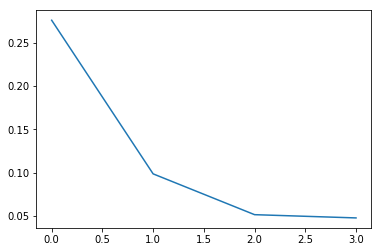

In [117]:
plt.plot(pca.explained_variance_ratio_)

In [118]:
#After each new PCA, the additional variance explained is going down.
# We want to use 4 PCA's

##### 2c) Find out how many clusters we need

In [119]:
# We want to create an empty table called results, and then to the outcome of the for loop into that table.
results= []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca)
    results.append(kmeans.inertia_)

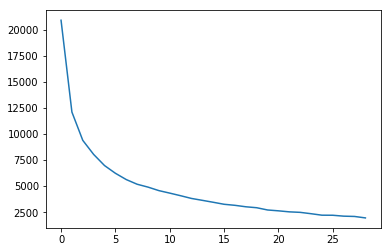

In [120]:
plt.plot(results)

In [121]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)

###### 2d) Now we want to add this new information to our original data

In [122]:
# Create a variable which has the cluster information.
clusters = kmeans.predict(X_pca)

In [123]:
len(clusters)

152

In [125]:
len(merged_data.dropna())

152

In [126]:
cluster_data = merged_data.dropna()
cluster_data['clusters'] = clusters

C:\Users\caruza laine\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
cluster_data.head()

,NOx,PM10,PM2.5,Health_212,Health_241,Health_253,Health_273,Health_285,Health_606,Health_607,...,ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate,Flag,Rank,clusters
LSOA Name,,,,,,,,,,,,,,,,,,,,,
Lambeth 036B,106.041920,26.435985,15.261605,0.01270,0.0620,0.013000,0.01740,0.0477,0.0492,0.00281,...,0.038,0.658,1.972,1.605,43200,43100,56300,0,11.0,4
Lambeth 002A,92.937396,25.316589,14.811003,0.01510,0.0743,0.015200,0.02040,0.0519,0.0495,0.00241,...,0.038,0.635,1.950,1.448,33300,33900,46600,0,11.0,3
Lambeth 036D,103.573867,26.082033,15.311363,0.00684,0.0382,0.010800,0.01020,0.0313,0.0360,0.00356,...,0.045,0.664,2.020,2.108,43200,43100,56300,0,9.0,4
Lambeth 020A,73.936381,23.398178,13.749818,0.00767,0.0496,0.010300,0.00966,0.0488,0.0632,0.00342,...,0.029,0.576,1.436,1.613,36800,42100,48900,0,11.0,7
Lambeth 016A,77.137655,23.843543,13.900969,0.01000,0.0542,0.010408,0.01130,0.0471,0.0561,0.00190,...,0.030,0.592,1.519,1.962,34500,35000,44100,0,11.0,1


In [136]:
# create a dataset with grouby cluster
cluster_data.groupby(['clusters']).mean().T


clusters,0,1,2,3,4,5,6,7,8,9
NOx,67.921528,76.037200,66.802843,85.607944,99.169264,78.662344,101.840594,78.518224,65.939598,81.460710
PM10,22.627068,23.558922,22.419002,24.565898,25.805319,23.821185,25.640169,23.785995,22.111236,24.082367
PM2.5,13.485050,13.873738,13.434288,14.273016,14.895880,13.949555,14.929176,14.002225,13.341737,14.065613
Health_212,0.011584,0.009591,0.008681,0.008877,0.008194,0.008788,0.006977,0.008883,0.011074,0.010868
Health_241,0.061373,0.054356,0.051071,0.058716,0.049678,0.070189,0.061967,0.052129,0.078730,0.069361
Health_253,0.011084,0.010656,0.009099,0.011790,0.012950,0.011397,0.011129,0.009993,0.008064,0.011722
Health_273,0.014327,0.011781,0.012953,0.012622,0.012890,0.012195,0.014211,0.011394,0.015957,0.013724
Health_285,0.049509,0.045856,0.046454,0.041708,0.038856,0.042400,0.038406,0.045029,0.045183,0.043871
Health_606,0.057474,0.054669,0.055710,0.053034,0.046744,0.054578,0.035456,0.052330,0.049094,0.052376
Health_607,0.003128,0.002948,0.003202,0.003419,0.003491,0.002976,0.002906,0.002919,0.002467,0.002934


In [129]:
cluster_data.groupby(['clusters']).min().T.head()
cluster_data.groupby(['clusters']).max().T.head()

clusters,0,1,2,3,4,5,6,7,8,9
NOx,60.683404,68.292830,61.159246,73.359043,78.277284,68.696059,82.236668,71.237323,61.738669,71.137933
PM10,21.529509,22.459828,21.658446,22.979834,24.425403,22.264510,24.258012,22.980617,21.568697,22.833367
PM2.5,13.038281,13.439415,13.138401,13.623853,14.019612,13.368764,14.204670,13.672635,13.168066,13.597075
Health_212,0.008900,0.005590,0.004660,0.005380,0.003350,0.005400,0.005160,0.005430,0.004200,0.006050
Health_241,0.041800,0.031000,0.037600,0.029600,0.021100,0.041400,0.033200,0.029900,0.033200,0.051800


clusters,0,1,2,3,4,5,6,7,8,9
NOx,75.513908,89.076597,75.988659,116.816111,121.708823,93.995114,116.192570,94.242341,74.167419,102.913198
PM10,24.843170,24.987696,23.964138,27.067502,27.383327,25.032663,26.596549,25.247073,22.916094,25.796728
PM2.5,14.109648,14.556375,13.945140,15.201114,15.388572,14.393914,15.384824,14.695876,13.597006,14.953149
Health_212,0.016900,0.015900,0.012300,0.015100,0.012700,0.015900,0.009190,0.013200,0.025200,0.024900
Health_241,0.080400,0.077100,0.068000,0.084200,0.065600,0.096900,0.079800,0.071100,0.113887,0.092400


In [130]:
cluster_data.head()

,NOx,PM10,PM2.5,Health_212,Health_241,Health_253,Health_273,Health_285,Health_606,Health_607,...,ID 2015 Sulphur dioxide (component of air quality indicator),ID 2015 Particulates (component of air quality indicator),ID 2015 Air quality indicator,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate,Flag,Rank,clusters
LSOA Name,,,,,,,,,,,,,,,,,,,,,
Lambeth 036B,106.041920,26.435985,15.261605,0.01270,0.0620,0.013000,0.01740,0.0477,0.0492,0.00281,...,0.038,0.658,1.972,1.605,43200,43100,56300,0,11.0,4
Lambeth 002A,92.937396,25.316589,14.811003,0.01510,0.0743,0.015200,0.02040,0.0519,0.0495,0.00241,...,0.038,0.635,1.950,1.448,33300,33900,46600,0,11.0,3
Lambeth 036D,103.573867,26.082033,15.311363,0.00684,0.0382,0.010800,0.01020,0.0313,0.0360,0.00356,...,0.045,0.664,2.020,2.108,43200,43100,56300,0,9.0,4
Lambeth 020A,73.936381,23.398178,13.749818,0.00767,0.0496,0.010300,0.00966,0.0488,0.0632,0.00342,...,0.029,0.576,1.436,1.613,36800,42100,48900,0,11.0,7
Lambeth 016A,77.137655,23.843543,13.900969,0.01000,0.0542,0.010408,0.01130,0.0471,0.0561,0.00190,...,0.030,0.592,1.519,1.962,34500,35000,44100,0,11.0,1


##### Is there a geographic significance?

In [133]:
cluster_geo = cluster_data.merge(geo_data, left_on = "LSOA Name", right_on= "LSOA_Name")

In [134]:
cluster_geo.head()

,NOx,PM10,PM2.5,Health_212,Health_241,Health_253,Health_273,Health_285,Health_606,Health_607,...,ID 2015 Road traffic accidents indicator,Net annual household income estimate before housing costs,Net annual household income estimate,Total annual household income estimate,Flag,Rank,clusters,LSOA_Code,LSOA_Name,geometry
0,106.041920,26.435985,15.261605,0.01270,0.0620,0.013000,0.01740,0.0477,0.0492,0.00281,...,1.605,43200,43100,56300,0,11.0,4,E01003014,Lambeth 036B,POLYGON ((-0.1095201184293505 51.4983760551768...
1,92.937396,25.316589,14.811003,0.01510,0.0743,0.015200,0.02040,0.0519,0.0495,0.00241,...,1.448,33300,33900,46600,0,11.0,3,E01003015,Lambeth 002A,POLYGON ((-0.112696104514192 51.49550272150114...
2,103.573867,26.082033,15.311363,0.00684,0.0382,0.010800,0.01020,0.0313,0.0360,0.00356,...,2.108,43200,43100,56300,0,9.0,4,E01003017,Lambeth 036D,POLYGON ((-0.1069985887250327 51.5062216126442...
3,73.936381,23.398178,13.749818,0.00767,0.0496,0.010300,0.00966,0.0488,0.0632,0.00342,...,1.613,36800,42100,48900,0,11.0,7,E01003018,Lambeth 020A,POLYGON ((-0.1196481941815794 51.4572800418066...
4,77.137655,23.843543,13.900969,0.01000,0.0542,0.010408,0.01130,0.0471,0.0561,0.00190,...,1.962,34500,35000,44100,0,11.0,1,E01003020,Lambeth 016A,POLYGON ((-0.1173706498859793 51.4585639281960...


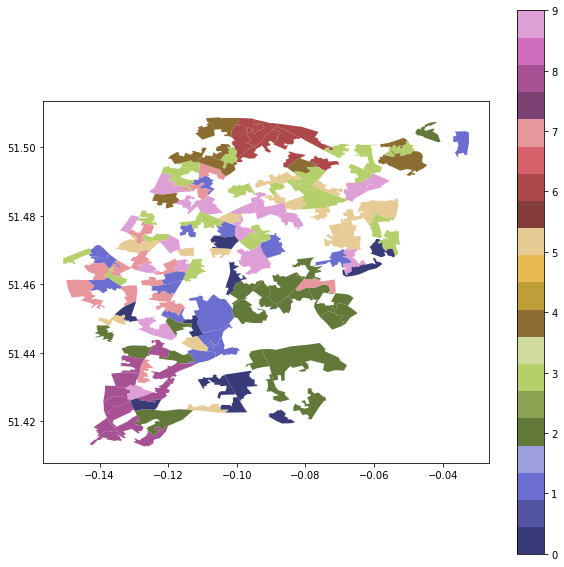

In [135]:
ax = plt.figure(figsize=(10,10)).gca()
cluster_geo.plot(column='clusters', cmap='tab20b', legend = True, ax=ax)

## No, there is not!